<a href="https://colab.research.google.com/github/mayamoneib/deliveryfood/blob/main/Copy_of_delivery1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline
#plt.style.use("seaborn")
#when using colab
# Set the style for plots using the updated seaborn style
plt.style.use("seaborn-v0_8") # Changed from 'seaborn' to 'seaborn-v0_8'

df = pd.read_csv('onlinedeliverydata.csv')

df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

from itertools import product
from scipy.stats import chi2_contingency
import shap

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [ ]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Marital Status,0
Occupation,0
Monthly Income,0
Educational Qualifications,0
Family size,0
latitude,0
longitude,0
Pin code,0


In [ ]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

Age : [20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
Gender : ['Female' 'Male']
Marital Status : ['Single' 'Married' 'Prefer not to say']
Occupation : ['Student' 'Employee' 'Self Employeed' 'House wife']
Monthly Income : ['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
Educational Qualifications : ['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
Family size : [4 3 6 2 5 1]
latitude : [12.9766 12.977  12.9551 12.9473 12.985  12.9299 12.9828 12.9854 12.8988
 12.9438 12.8893 12.9783 12.982  13.0298 12.9983 12.9925 12.9306 12.9353
 12.9155 13.0019 12.9698 12.9261 12.9119 12.9662 12.9565 13.0206 12.9635
 13.0067 12.8845 13.0158 12.9343 13.0012 12.9442 13.0487 12.9889 12.9335
 13.102  12.9048 12.9337 12.9037 13.0289 12.9561 12.9579 13.014  13.0138
 12.9537 12.998  13.0496 13.0166 13.0503 12.9883 13.0626 12.957  12.8652
 12.9757 12.9621 12.9217 13.0223 13.0262 13.0078 12.9105 12.8834 12.9149
 12.9706 13.0103 13.0641 12.9369 13.0809 12.9859 12.986

In [3]:
df_copy = df.copy()
df_copy.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [4]:
df_copy.drop(['latitude', 'longitude', 'Pin code','Reviews'], axis=1, inplace=True)

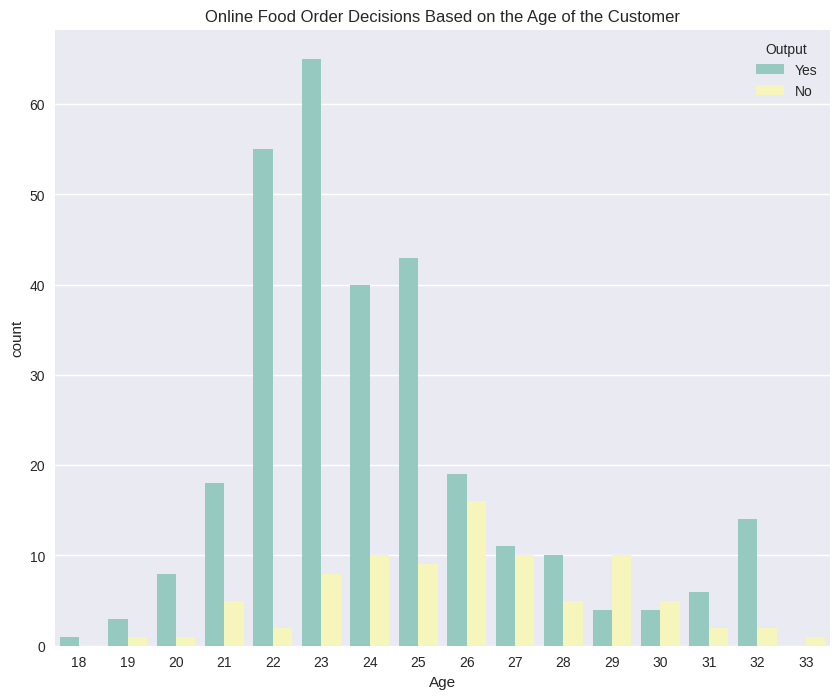

In [5]:
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.countplot(x='Age',data=df_copy,hue='Output',palette="Set3");

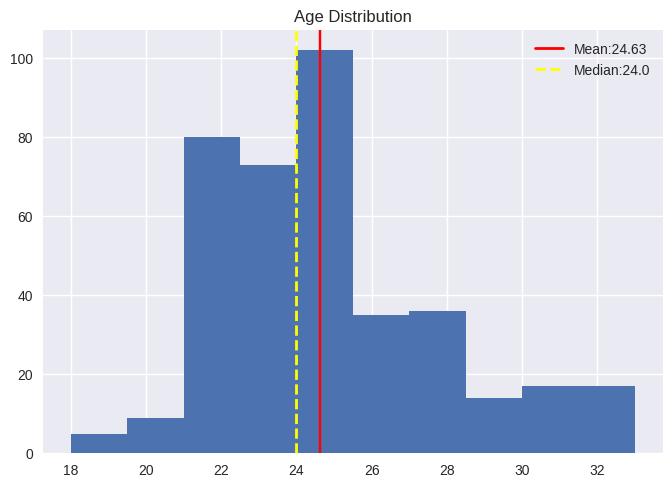

In [7]:
plt.hist(df_copy['Age'])
plt.axvline(x=df_copy['Age'].mean(),color='red')
plt.axvline(x=df_copy['Age'].median(),color='yellow',ls='--', lw=2)

custom_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='yellow', lw=2, ls='--')]
plt.legend(custom_lines, [f"Mean:{round(df_copy['Age'].mean(),2)}", f"Median:{round(df_copy['Age'].median(),2)}"])
plt.title('Age Distribution')
plt.show()

In [10]:
influence = df_copy[['Ease and convenient','Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system']]

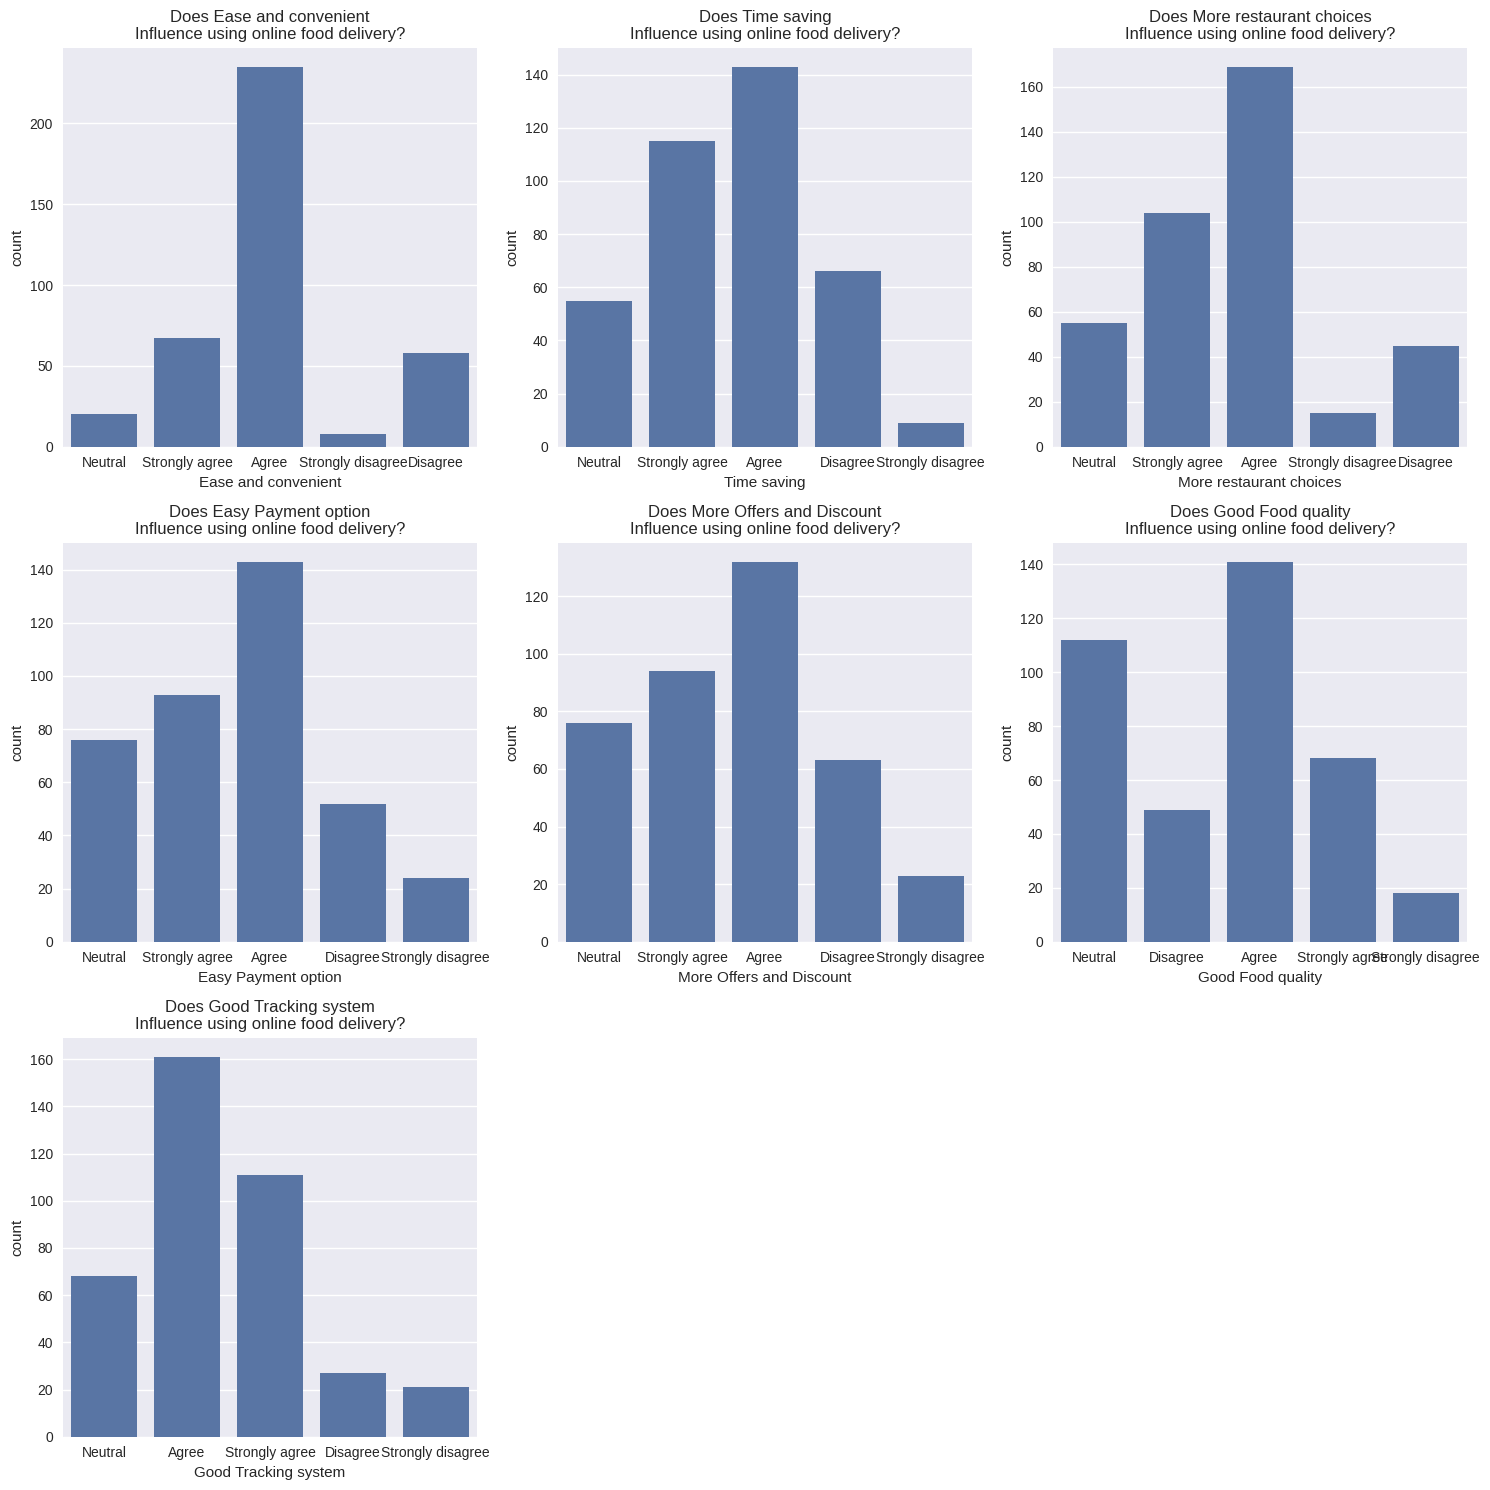

In [11]:
plt.figure(figsize=(15,15))
for i, column in enumerate(influence):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=column)
    plt.title(f'Does {column}\nInfluence using online food delivery?')
    plt.tight_layout()

In [22]:
# Replace the string value to number
df_copy = df_copy.replace(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000', '25001 to 50000'], [1,2,3,4,5])
#df_copy = df_copy.replace(['yes', 'no', 'maybe'], [1, 0, 2])
df_copy = df_copy.replace(['strongly disagree', 'disagree', 'Neutral', 'Agree', 'strongly agree'], [1,2,3,4,5])
#df_copy = df_copy.replace(['unimportant', 'slightly important','important', 'moderately important', 'very important'], [1,2,3,4,5])


<ipython-input-22-ebc212480fcc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy = df_copy.replace(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000', '25001 to 50000'], [1,2,3,4,5])


In [18]:
# Change some features value to number, so we can plot it
df_copy = df_copy.replace(['0', '<10k', '10k-25k', '25k-50k', '>50k'], [1,2,3,4,5])
df_copy = df_copy.replace(['15 minutes', '30 minutes', '45 minutes', '60 minutes', 'more than 60 minutes'], [1,2,3,4,5])
cat_col = ['Gender']
for col in cat_col:
    df_copy[col] = LabelEncoder().fit_transform(df_copy[col])

before replacing the likert results, check for capitalization of each instance, whether it's for agreebaleness or importance e.g. Strongly Agree vs Strongly agree--> need to be aligned to replace from string to float.